In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

from statannotations.Annotator import Annotator

import json

In [56]:
plt.rcParams["font.family"] = "Times New Roman"
sns.set(rc={'text.usetex' : True})
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [24]:
cartography_df = pd.read_csv('./results/full_cartography.csv')
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
0,0,0,Yes indeed. She sort of reminds me of the elde...,0.979439,0.022946,0.996452,0.016314,0.021729,0.003200,0.004247,...,0.979439,0.022946,0.996452,True,0.0,1.0,1.0,False,0.967461,0.042144
1,1,0,Yes indeed. She sort of reminds me of the elde...,0.865400,0.223174,0.950641,0.049838,0.051277,0.048247,0.084761,...,0.865400,0.223174,0.950641,True,0.0,1.0,1.0,False,0.967461,0.042144
2,2,0,Yes indeed. She sort of reminds me of the elde...,0.997998,0.002761,0.999996,0.001491,0.001997,0.000004,0.000512,...,0.997998,0.002761,0.999996,True,0.0,1.0,1.0,False,0.967461,0.042144
3,3,0,Yes indeed. She sort of reminds me of the elde...,0.972739,0.048130,0.999696,0.014822,0.021249,0.000300,0.012439,...,0.972739,0.048130,0.999696,True,0.0,1.0,1.0,False,0.967461,0.042144
4,4,0,Yes indeed. She sort of reminds me of the elde...,0.991905,0.010910,0.997815,0.007289,0.011239,0.002185,0.000806,...,0.991905,0.010910,0.997815,True,0.0,1.0,1.0,False,0.967461,0.042144


In [25]:
both_votes_df = cartography_df[cartography_df['agreement_factor'] < 1.0].copy()
both_votes_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,...,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
5,0,6030,"It's that season, when niggas go to jail for n...",0.325298,0.088896,0.284761,0.214807,0.069897,0.322640,0.459894,...,0.214807,0.069897,0.322640,False,2.0,0.6,0.6,True,0.751516,0.183129
6,1,6030,"It's that season, when niggas go to jail for n...",0.289688,0.056357,0.315893,0.293534,0.136602,0.399393,0.416778,...,0.289688,0.056357,0.315893,False,2.0,0.6,0.6,True,0.751516,0.183129
7,2683,6030,"It's that season, when niggas go to jail for n...",0.375071,0.146084,0.386261,0.052920,0.036037,0.056826,0.572009,...,0.572009,0.137849,0.556913,True,2.0,0.6,0.6,False,0.751516,0.183129
8,5548,6030,"It's that season, when niggas go to jail for n...",0.229786,0.155913,0.052430,0.033205,0.055155,0.004640,0.737009,...,0.737009,0.189778,0.942930,True,2.0,0.6,0.6,False,0.751516,0.183129
9,6427,6030,"It's that season, when niggas go to jail for n...",0.356922,0.039684,0.354974,0.053855,0.052186,0.049717,0.589223,...,0.589223,0.072862,0.595310,True,2.0,0.6,0.6,False,0.751516,0.183129


In [26]:
both_votes_df['label'] = both_votes_df['label'].astype(int)

In [27]:
cartography_df['Mindex'].nunique()

31652

In [28]:
both_votes_df[both_votes_df['Mindex'] == 6030][['confidence', 'text', 'Aindex', 'pred', 'label']].values

array([[0.2148074775934219,
        "It's that season, when niggas go to jail for no reason.", 0, 2,
        1],
       [0.2896877378225326,
        "It's that season, when niggas go to jail for no reason.", 1, 1,
        0],
       [0.5720087110996246,
        "It's that season, when niggas go to jail for no reason.", 2683,
        2, 2],
       [0.7370088219642639,
        "It's that season, when niggas go to jail for no reason.", 5548,
        2, 2],
       [0.5892233431339264,
        "It's that season, when niggas go to jail for no reason.", 6427,
        2, 2]], dtype=object)

In [29]:
both_votes_df[both_votes_df['Aindex'] == 0][['confidence', 'text', 'pred', 'label']].values

array([[0.2148074775934219,
        "It's that season, when niggas go to jail for no reason.", 2, 1],
       [0.0681763602420687,
        '@papillonpsyche gerry and Martin "mortifying gay parents" solidarity',
        0, 2],
       [0.910931134223938,
        "Hitler didn't finish it. Can u. If a nigger ur Jew confronts u in the street what then.",
        2, 2],
       [0.821619176864624,
        'Yes, in barbaric, authoritarian cultures that have since been condemned. Interesting that Christians desire to perpetuate the same idea.',
        0, 0]], dtype=object)

In [30]:
len(both_votes_df)

65881

In [31]:
both_votes_df['Mindex'].nunique()

9556

In [32]:
grouped_data_label = both_votes_df.groupby(['Mindex', 'label']).agg({'confidence': 'mean'}).reset_index()
grouped_data_label = grouped_data_label.pivot(index='Mindex', columns='label', values='confidence').reset_index()
grouped_data_label.rename(columns={0: 'label_0', 1: 'label_1', 2: 'label_2'}, inplace=True)
grouped_data_label.fillna(0.0, inplace=True)
grouped_data_label.head()

label,Mindex,label_0,label_1,label_2
0,2,0.000000,0.274606,0.236653
1,3,0.913728,0.000000,0.130511
2,4,0.899364,0.000000,0.590355
3,9,0.725200,0.262707,0.534303
4,13,0.828116,0.268279,0.000000


In [33]:
count_column = both_votes_df.groupby('Mindex').size().reset_index(name='count')
grouped_data_label = grouped_data_label.merge(count_column, on='Mindex')

In [34]:
grouped_data_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9556 entries, 0 to 9555
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mindex   9556 non-null   int64  
 1   label_0  9556 non-null   float64
 2   label_1  9556 non-null   float64
 3   label_2  9556 non-null   float64
 4   count    9556 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 447.9 KB


In [35]:
# for all label greater
condition1 = ((grouped_data_label['label_0'] > 0.5) | (grouped_data_label['label_0'] == 0.0)) & ((grouped_data_label['label_1'] > 0.5) | (grouped_data_label['label_1'] == 0.0)) & ((grouped_data_label['label_2'] > 0.5) | (grouped_data_label['label_2'] == 0.0))
# for all label lower
condition2 = (grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] <= 0.5) & (grouped_data_label['label_2'] <= 0.5)
# for 2 labels greater when all 3 are present

condition3 = ((grouped_data_label['label_0'] > 0.5) ^ (grouped_data_label['label_1'] > 0.5) ^ (grouped_data_label['label_2'] > 0.5))

# condition3 = (grouped_data_label['label_0'] > 0.5) | (grouped_data_label['label_1'] > 0.5) | (grouped_data_label['label_2'] > 0.5)
# for only 1 label greater when 2 or 3 are present
condition4 = (~condition1) & (~condition2) & (~condition3)

In [36]:
grouped_data_label[condition3].head()

,Mindex,label_0,label_1,label_2,count
1,3,0.913728,0.000000,0.130511,4
4,13,0.828116,0.268279,0.000000,2
5,14,0.602813,0.249745,0.499229,4
6,16,0.758738,0.152366,0.000000,4
7,17,0.375968,0.148244,0.634148,4


In [83]:
all_greater_indices = grouped_data_label[condition1]['Mindex'].values
none_greater_indices = grouped_data_label[condition2]['Mindex'].values
one_greater_indices = grouped_data_label[condition3]['Mindex'].values
two_greater_indices = grouped_data_label[condition4]['Mindex'].values


grouped_data_label['group'] = 0
grouped_data_label.loc[grouped_data_label['Mindex'].isin(all_greater_indices), 'group'] = 'All Labels > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(none_greater_indices), 'group'] = '0 Labels > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(one_greater_indices), 'group'] = '1 Label > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(two_greater_indices), 'group'] = '2 Labels > 0.5'

In [84]:
grouped_data_label[grouped_data_label['count'] == grouped_data_label['count'].max()]['Mindex']

9512    39504
Name: Mindex, dtype: int64

In [39]:
grouped_data_label[(grouped_data_label['group']=='one_greater') & (grouped_data_label['count']< 10)]['count'].mean()

nan

# Final plotting

In [40]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'supportive', 1: 'neutral', 2:'hate speech'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.539e+09


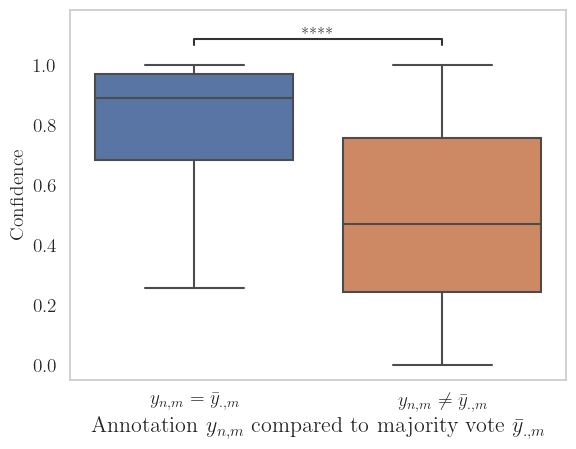

In [60]:
ax = sns.boxplot(data=cartography_df, x="disagrees_with_majority", y="confidence", showfliers=False)

pairs=[ (False, True)]


annotator = Annotator(ax, pairs, data=cartography_df, x="disagrees_with_majority", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

# plt.title('Samples with low confidence (<0.5) in Single-GL model', fontsize=16)
plt.xticks([0, 1], [r'$y_{n,m} = \bar{{y}}_{.,m}$', r'$y_{n,m} \neq \bar{{y}}_{.,m}$'], fontsize=14)

ax.grid(False)

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel(r"Annotation $y_{n,m}$ compared to majority vote $\bar{{y}}_{.,m}$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("./plots/disco/kennedy_disagree_vs_conf.pdf", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:1.437e-307 U_stat=1.448e+08
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.611e+08
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.485e+08


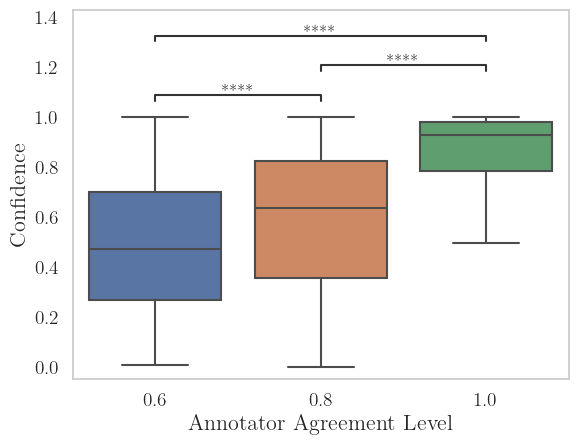

In [62]:
ax = sns.boxplot(data=cartography_df.sample(frac=1), x="agreement_factor_rd", y="confidence", showfliers=False)


pairs=[ (0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=16)
plt.gca().set_xlabel('Annotator Agreement Level', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.grid(False)
# plt.legend(title = 'Label', loc='lower right')
plt.savefig("./plots/disco/kennedy_agr_factor_vs_conf.pdf", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.539e+09


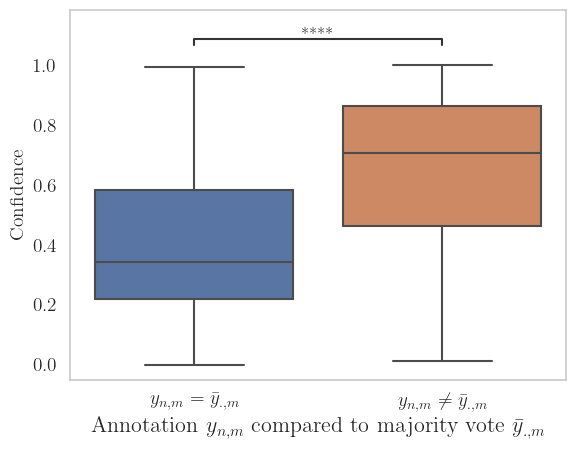

In [63]:
ax = sns.boxplot(data=cartography_df[cartography_df['majority_confidence']<0.5], x="disagrees_with_majority", y="confidence", showfliers=False)

pairs=[ (False, True)]


annotator = Annotator(ax, pairs, data=cartography_df, x="disagrees_with_majority", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

# plt.title('Samples with low confidence (<0.5) in Single-GL model', fontsize=16)
plt.xticks([0, 1], [r'$y_{n,m} = \bar{{y}}_{.,m}$', r'$y_{n,m} \neq \bar{{y}}_{.,m}$'], fontsize=14)

ax.grid(False)

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel(r"Annotation $y_{n,m}$ compared to majority vote $\bar{{y}}_{.,m}$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("./plots/disco/kennedy_low_conf_mjr_disagree_vs_conf.pdf", dpi=600, bbox_inches='tight')

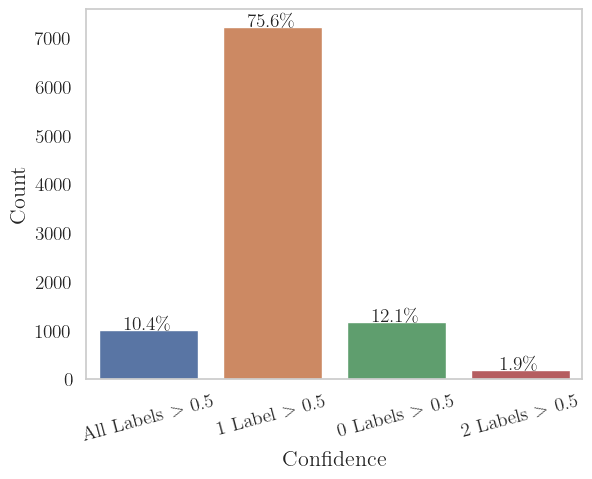

In [103]:

# ax = sns.countplot(x=grouped_data_label['group'], order=grouped_data_label['group'].value_counts().index)
ax = sns.countplot(x=grouped_data_label['group'], order=['All Labels > 0.5', '1 Label > 0.5', '0 Labels > 0.5', '2 Labels > 0.5'])
ax.grid(False)

# plt.title('Confidence of Samples with Disagreement in Label', fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=16)
plt.gca().set_xlabel('Confidence', fontsize=16)

plt.yticks(fontsize=14)


plt.xticks([0, 1, 2, 3], [r'All Labels \textgreater\ 0.5', r'1 Label \textgreater\ 0.5', r'0 Labels \textgreater\ 0.5', r'2 Labels \textgreater\ 0.5'], fontsize=14, rotation=15)

total = grouped_data_label["group"].value_counts().sum()  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}\%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20  # Adjust the vertical position of the label
    ax.text(x, y, percentage, ha="center", fontsize=14)
    
plt.savefig("./plots/disco/kennedy_group_count.pdf", dpi=600, bbox_inches='tight')

In [59]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.5085046431910627, pvalue=0.0)

In [30]:
max_conf_df = cartography_df.groupby('Mindex').agg({'confidence': 'max', 'majority_confidence': 'first'})
max_conf_df.head()

,confidence,majority_confidence
Mindex,,
0,0.997998,0.967461
1,0.997448,0.978830
2,0.293197,0.390326
3,0.982305,0.931561
4,0.899364,0.200328


/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

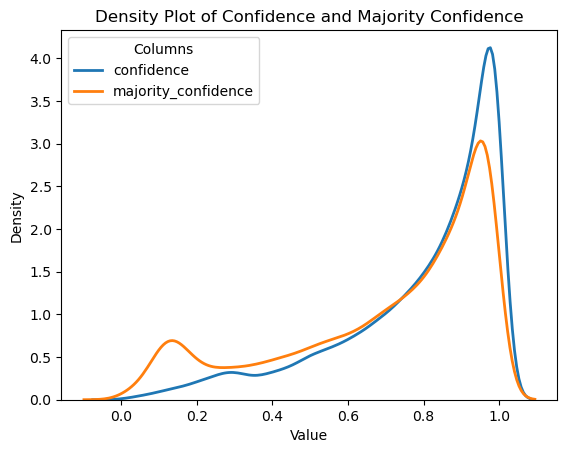

In [33]:
sns.distplot(max_conf_df['confidence'], hist = False, kde = True, kde_kws = {'linewidth': 2}, label = 'confidence')
sns.distplot(max_conf_df['majority_confidence'], hist = False, kde = True, kde_kws = {'linewidth': 2}, label = 'majority_confidence')
plt.legend(prop={'size': 10}, title = 'Columns')
plt.title('Density Plot of Confidence and Majority Confidence')
plt.xlabel('Value')
plt.ylabel('Density')

In [81]:
cartography_df.columns

Index(['Aindex', 'Mindex', 'text', 'label_0_mean', 'label_0_std',
       'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last',
       'label_2_mean', 'label_2_std', 'label_2_last', 'label', 'pred',
       'comment_id', 'annotator_id', 'hate_speech_score', 'confidence',
       'variability', 'correctness', 'is_correct', 'majority_label',
       'agreement_factor', 'agreement_factor_rd', 'disagrees_with_majority',
       'majority_confidence', 'majority_variability', 'label_text'],
      dtype='object')

In [85]:
grouped_data_label.columns

Index(['Mindex', 'label_0', 'label_1', 'label_2', 'count', 'group'], dtype='object')

<Axes: xlabel='group', ylabel='count'>

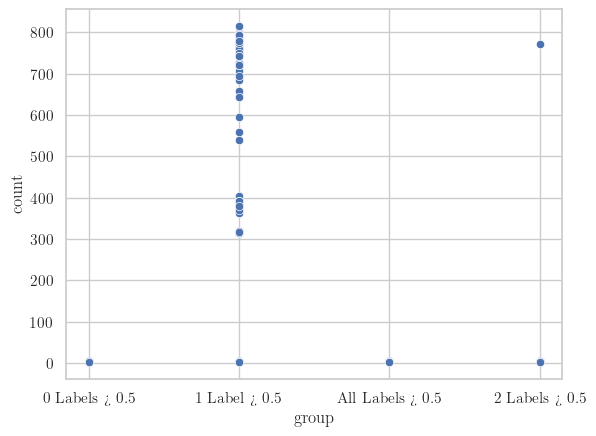

In [88]:
sns.scatterplot(x=grouped_data_label['group'], y=grouped_data_label['count'])

In [98]:
grouped_data_label.groupby('group')['count'].agg( ['mean', 'std', 'count'])

,mean,std,count
group,,,
0 Labels > 0.5,2.674459,0.754878,1155
1 Label > 0.5,8.101080,59.241394,7222
2 Labels > 0.5,7.736264,56.966664,182
All Labels > 0.5,2.886660,0.748622,997


In [102]:
grouped_data_label['group'].value_counts()

1 Label > 0.5       7222
0 Labels > 0.5      1155
All Labels > 0.5     997
2 Labels > 0.5       182
Name: group, dtype: int64